In [1]:
from naas_drivers import linkedin
import pandas as pd
from datetime import datetime
import naas
import numpy as np

With this notebook, you can get post stats from any profile in LinkedIn.<br>
A dataframe will be returned and saved in CSV on your local.<br><br>
**Available columns :**
- **ACTIVITY_ID:** Post unique ID.
- **PAGINATION_TOKEN:** Token used to decode published date.
- **PUBLISHED_DATE:** When the post has been published.
- **AUTHOR_NAME:** Name of post author.
- **SUBDESCRIPTION:** Subdescription of post (Time since published).
- **TITLE:** First sentence of post.
- **TEXT:** Content of post.
- **CHARACTER_COUNT:** Number of characters in the post.  
- **TAGS:** List of the hashtags. 
- **TAGS_COUNT:** Number of hashtags.
- **EMOJIS:** List of emojis.
- **EMOJIS_COUNT:** Number of emojis.
- **LINKS:** Links used in post.
- **LINKS_COUNT:** Number of links.
- **PROFILE_MENTION:** People mentioned in post. 
- **COMPANY_MENTION:** Companies mentioned in post.
- **CONTENT:** Type of content.
- **CONTENT_TITLE:** Type of post content.
- **CONTENT_URL:** Title of content.
- **CONTENT_ID:** ID of content.
- **IMAGE_URL:** Image URL linked in post.
- **POLL_ID:** Poll unique ID.
- **POLL_QUESTION:** Poll question.
- **POLL_RESULTS:** Poll results.
- **POST_URL:** Post URL.
- **VIEWS:** Amount of people who saw the content (Only available on your post profile).
- **COMMENTS:** Amount of people who wrote something in the comment section.
- **LIKES:** Amount of people who pushed the like (or other reaction) button.
- **SHARES:** Amount of people who shared the content.
- **ENGAGEMENT_SCORE:** Ratio between views and likes/comments (It will be at 0 if you are not the author of the post).
- **DATE_EXTRACT:** Date of last extraction.

In [2]:
# LinkedIn cookies
LI_AT = "AQEDARkqOT4Byd7cAAABf-F19-8AAAGAzYO4ME4AWh2cCnrQFMhEDFs2JaPe9aYsI48Ur88_rcAubS-cEte_0TRHHdYVf4jOwYUtbTfPXEjJDnYMwrKcNTzZvnnz6j-34HDi_R3KjjgwVtfPY0cbEDK5"
# EXAMPLE : "AQFAzQN_PLPR4wAAAXc-FCKmgiMit5FLdY1af3-2"
JSESSIONID = "ajax:6501538588737618825" # EXAMPLE : "ajax:8379907400220387585"

# LinkedIn profile url
PROFILE_URL = "https://www.linkedin.com/in/meganlieu/" # EXAMPLE "https://www.linkedin.com/in/myprofile/"

# The first execution all posts will be retrieved.
# Then, you can use the parameter below to setup the number of posts you want to retrieved from LinkedIn API everytime this notebook is run.
NO_POSTS_RETRIEVED = 10

### Setup Outputs
Create CSV to store your posts stats.<br>
PS: This CSV could be used in others LinkedIn templates.

In [3]:
# Custom path of your CSV with the profile URL
profile_id = PROFILE_URL.split("https://www.linkedin.com/in/")[-1].split("/")[0]
csv_output = f"LINKEDIN_POSTS_{profile_id}.csv"

### Setup Naas scheduler
Schedule your notebook with the naas scheduler feature

In [4]:
# the default settings below will make the notebook run everyday at 8:00
# for information on changing this setting, please check https://crontab.guru/ for information on the required CRON syntax 
# naas.scheduler.add(cron="0 8 * * *")

# to de-schedule this notebook, simply run the following command: 
# naas.scheduler.delete()

# Model

### Get your posts from CSV
All your posts will be stored in CSV.

In [5]:
def read_csv(file_path):
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError as e:
        # Empty dataframe returned
        return pd.DataFrame()
    return df

df_posts = read_csv(csv_output)
df_posts.head()

,ACTIVITY_ID,PAGINATION_TOKEN,PUBLISHED_DATE,AUTHOR_NAME,SUBDESCRIPTION,TITLE,TEXT,CHARACTER_COUNT,TAGS,TAGS_COUNT,...,POLL_QUESTION,POLL_RESULTS,POST_URL,VIEWS,COMMENTS,LIKES,SHARES,ENGAGEMENT_SCORE,text_snip,DATE_EXTRACT
0,6.930654e+18,dXJuOmxpOmFjdGl2aXR5OjY5MzA2NTQ0MTQ5MzIyMzAxND...,2022-05-12 21:06:17+00:00,Megan Lieu,3 days ago,If you’re ok with always feeling like you know...,If you’re ok with always feeling like you know...,381,#data #careers #datascience,3.0,...,NaN,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,14111,53,166,0,0.0155,If you’re ok with always,2022-05-16 03:43:42
1,6.930299e+18,dXJuOmxpOmFjdGl2aXR5OjY5MzAyOTg3NDkwNTk0ODE2MD...,2022-05-11 21:33:00+00:00,Megan Lieu,4 days ago,The SCARIEST moment of my career happened rece...,The SCARIEST moment of my career happened rece...,376,#coding #SQL #engineering,3.0,...,NaN,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,66782,77,587,0,0.0099,The SCARIEST moment of my,2022-05-16 03:43:42
2,6.929782e+18,dXJuOmxpOmFjdGl2aXR5OjY5Mjk3ODE1NjEyODIyMTU5Mz...,2022-05-10 11:17:53+00:00,Megan Lieu,5 days ago,"What’s the best, most underrated way to improv...","What’s the best, most underrated way to improv...",1042,#coding #interview #learning,3.0,...,NaN,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,15837,43,98,0,0.0089,"What’s the best, most und",2022-05-16 03:43:42
3,6.927969e+18,dXJuOmxpOmFjdGl2aXR5OjY5Mjc5Njg5NDc0NjQwMTU4Nz...,2022-05-05 11:15:12+00:00,Megan Lieu,1 week ago,Does anyone else ALWAYS forget to add “desc” i...,Does anyone else ALWAYS forget to add “desc” i...,171,#SQL #data #coding,3.0,...,NaN,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,26096,104,197,0,0.0115,Does anyone else ALWAYS f,2022-05-16 03:43:42
4,6.927245e+18,dXJuOmxpOmFjdGl2aXR5OjY5MjcyNDU0MjI1NDEzNjExNT...,2022-05-03 11:20:10+00:00,Megan Lieu,1 week ago,"“Megan, what courses/certifications would you ...","“Megan, what courses/certifications would you ...",1527,#PowerBI #data #analytics #dataanalytics,4.0,...,NaN,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,104982,69,455,0,0.0050,"“Megan, what courses/cert",2022-05-16 03:43:42


### Update last posts
It will get the last X posts from LinkedIn API (X = number of set in variable "NO_POSTS_RETRIEVED") and update it in your CSV.<br>
PS: On the first execution all posts will be retrieved.

In [6]:
def update_last_posts(df_posts, key="POST_URL", no_posts=100):
    # Init output
    df_update = pd.DataFrame()
    
    # Init df posts is empty then return entire database
    if len(df_posts) > 0:
        # If df posts not empty get the last X posts (new and already existing)
        df_update = linkedin.connect(LI_AT, JSESSIONID).profile.get_posts_feed(PROFILE_URL,
                                                                               limit=no_posts,
                                                                               sleep=False)
    else:
        df_update = linkedin.connect(LI_AT, JSESSIONID).profile.get_posts_feed(PROFILE_URL,
                                                                               limit=-1)
    # Concat and add extract date
    df = pd.concat([df_update, df_posts]).drop_duplicates(key, keep="first")
    df["DATE_EXTRACT"] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")        
    # Return only last post retrieved
    return df.reset_index(drop=True)
    
df_update = update_last_posts(df_posts,
                              no_posts=NO_POSTS_RETRIEVED)
df_update = df_update.drop(df_update[df_update['ACTIVITY_ID'].isna()].index)
df_update.head()

,ACTIVITY_ID,PAGINATION_TOKEN,PUBLISHED_DATE,AUTHOR_NAME,SUBDESCRIPTION,TITLE,TEXT,CHARACTER_COUNT,TAGS,TAGS_COUNT,...,POLL_QUESTION,POLL_RESULTS,POST_URL,VIEWS,COMMENTS,LIKES,SHARES,ENGAGEMENT_SCORE,text_snip,DATE_EXTRACT
0,6930654414932230144,dXJuOmxpOmFjdGl2aXR5OjY5MzA2NTQ0MTQ5MzIyMzAxND...,2022-05-12 23:06:17+02:00,Megan Lieu,4 days ago,If you’re ok with always feeling like you know...,If you’re ok with always feeling like you know...,381,#data #careers #datascience,3.0,...,None,None,https://www.linkedin.com/feed/update/urn:li:ac...,14928,53,170,0,0.0149,NaN,2022-05-17 02:17:49
1,6930298749059481600,dXJuOmxpOmFjdGl2aXR5OjY5MzAyOTg3NDkwNTk0ODE2MD...,2022-05-11 23:33:00+02:00,Megan Lieu,5 days ago,The SCARIEST moment of my career happened rece...,The SCARIEST moment of my career happened rece...,376,#coding #SQL #engineering,3.0,...,None,None,https://www.linkedin.com/feed/update/urn:li:ac...,68577,77,596,0,0.0098,NaN,2022-05-17 02:17:49
2,6929781561282215936,dXJuOmxpOmFjdGl2aXR5OjY5Mjk3ODE1NjEyODIyMTU5Mz...,2022-05-10 13:17:53+02:00,Megan Lieu,6 days ago,"What’s the best, most underrated way to improv...","What’s the best, most underrated way to improv...",1042,#coding #interview #learning,3.0,...,None,None,https://www.linkedin.com/feed/update/urn:li:ac...,16347,43,98,0,0.0086,NaN,2022-05-17 02:17:49
3,6927968947464015872,dXJuOmxpOmFjdGl2aXR5OjY5Mjc5Njg5NDc0NjQwMTU4Nz...,2022-05-05 13:15:12+02:00,Megan Lieu,1 week ago,Does anyone else ALWAYS forget to add “desc” i...,Does anyone else ALWAYS forget to add “desc” i...,171,#SQL #data #coding,3.0,...,None,None,https://www.linkedin.com/feed/update/urn:li:ac...,26661,104,198,0,0.0113,NaN,2022-05-17 02:17:49
4,6927245422541361154,dXJuOmxpOmFjdGl2aXR5OjY5MjcyNDU0MjI1NDEzNjExNT...,2022-05-03 13:20:10+02:00,Megan Lieu,1 week ago,"“Megan, what courses/certifications would you ...","“Megan, what courses/certifications would you ...",1527,#PowerBI #data #analytics #dataanalytics,4.0,...,None,None,https://www.linkedin.com/feed/update/urn:li:ac...,105275,69,456,0,0.0050,NaN,2022-05-17 02:17:49


# Data Cleaning

In [7]:
df_update['text_snip'] = df_update['TEXT'].str[:25]
df_update['text_snip'] = np.where(df_update['TITLE']=='My toxic trait:', df_update['TITLE'], df_update['text_snip'])
df_update['EMOJIS_COUNT'] = np.where(df_update['EMOJIS_COUNT'].isna(), 0, df_update['EMOJIS_COUNT'])
df_update['PUBLISHED_DATE'] = pd.to_datetime(df_update['PUBLISHED_DATE'], utc=True)

In [8]:
import matplotlib.pyplot as plt
# !pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
# !pip install seaborn as sns
import seaborn as sns
plt.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)

In [9]:
#take out outlier and filter out unnecessary columns/posts
df2 = df_update[df_update['LIKES']<48000]
df2 = df2[df2['PUBLISHED_DATE']>"2021-07-01"]
df2 = df2[['PUBLISHED_DATE', 'SUBDESCRIPTION', 'TITLE', 'TEXT', 'CHARACTER_COUNT', 'TAGS', 'TAGS_COUNT', 'EMOJIS', 'EMOJIS_COUNT', 'VIEWS', 'COMMENTS', 'LIKES', 'SHARES', 'ENGAGEMENT_SCORE', 'text_snip']]
df2.sort_values(by='COMMENTS', ascending=False).head(10)

,PUBLISHED_DATE,SUBDESCRIPTION,TITLE,TEXT,CHARACTER_COUNT,TAGS,TAGS_COUNT,EMOJIS,EMOJIS_COUNT,VIEWS,COMMENTS,LIKES,SHARES,ENGAGEMENT_SCORE,text_snip
35,2021-12-29 19:51:58+00:00,4 months ago,My toxic trait:,My toxic trait:\n\nStaring at a computer scree...,483,#codinglife #programming #python #dataanalytics,4.0,🥳,1.0,413260,237,3257,0,0.0085,My toxic trait:
30,2022-01-26 13:58:01+00:00,3 months ago,"The Dunning-Kruger effect, as explained by my ...","The Dunning-Kruger effect, as explained by my ...",1013,#sql #dataanalytics #codinglife,3.0,"🤷🏻‍♀️, 😯, 😎, 🤩, 🤔, 😬, 😖, 😌",8.0,98656,125,1127,0,0.0127,The Dunning-Kruger effect
11,2022-04-12 11:17:53+00:00,1 month ago,"Sometimes I code in Python, R and SQL all in t...","Sometimes I code in Python, R and SQL all in t...",186,#coding #python #sql,3.0,😳,1.0,149900,106,1474,0,0.0105,Sometimes I code in Pytho
3,2022-05-05 11:15:12+00:00,1 week ago,Does anyone else ALWAYS forget to add “desc” i...,Does anyone else ALWAYS forget to add “desc” i...,171,#SQL #data #coding,3.0,🙃,1.0,26661,104,198,0,0.0113,Does anyone else ALWAYS f
10,2022-04-14 11:21:25+00:00,1 month ago,How to instantly look like you know what you’r...,How to instantly look like you know what you’r...,113,#coding #programming #python,3.0,😎,1.0,42629,104,289,0,0.0092,How to instantly look lik
13,2022-04-05 11:13:45+00:00,1 month ago,How did I get 5.6m views and 48k reactions on ...,How did I get 5.6m views and 48k reactions on ...,1263,#contentstrategy #personalbranding #networking,3.0,"🚀, 😭, 📈, 📉, 🙏",5.0,62383,96,494,0,0.0095,How did I get 5.6m views
23,2022-02-24 13:16:43+00:00,2 months ago,True story: the day before my first analytics ...,True story: the day before my first analytics ...,780,#sql #analytics #dataanalytics,3.0,"🙃, 😬, 🤷🏻‍♀️, 😵‍💫, 😦, 😅",6.0,50865,89,597,0,0.0135,True story: the day befor
24,2022-02-22 13:14:48+00:00,2 months ago,Tell me you work in data without telling me yo...,Tell me you work in data without telling me yo...,388,#data #analytics #datascience,3.0,"👇🏼, 🤔, 🔢, 🤓",4.0,25947,82,128,0,0.0081,Tell me you work in data
1,2022-05-11 21:33:00+00:00,5 days ago,The SCARIEST moment of my career happened rece...,The SCARIEST moment of my career happened rece...,376,#coding #SQL #engineering,3.0,"😖, 🥲",2.0,68577,77,596,0,0.0098,The SCARIEST moment of my
28,2022-02-03 13:07:58+00:00,3 months ago,Things data analysts love:,Things data analysts love:\nGetting our hands ...,377,#dataanalytics #datavisualization,2.0,🙄,1.0,35070,71,377,0,0.0128,Things data analysts love


In [10]:
df2.head()

,PUBLISHED_DATE,SUBDESCRIPTION,TITLE,TEXT,CHARACTER_COUNT,TAGS,TAGS_COUNT,EMOJIS,EMOJIS_COUNT,VIEWS,COMMENTS,LIKES,SHARES,ENGAGEMENT_SCORE,text_snip
0,2022-05-12 21:06:17+00:00,4 days ago,If you’re ok with always feeling like you know...,If you’re ok with always feeling like you know...,381,#data #careers #datascience,3.0,"👍, 🙌, 😌",3.0,14928,53,170,0,0.0149,If you’re ok with always
1,2022-05-11 21:33:00+00:00,5 days ago,The SCARIEST moment of my career happened rece...,The SCARIEST moment of my career happened rece...,376,#coding #SQL #engineering,3.0,"😖, 🥲",2.0,68577,77,596,0,0.0098,The SCARIEST moment of my
2,2022-05-10 11:17:53+00:00,6 days ago,"What’s the best, most underrated way to improv...","What’s the best, most underrated way to improv...",1042,#coding #interview #learning,3.0,"✨, ✨, 😱, 📈, 🔢, ⏱, 🙌, 🤔",8.0,16347,43,98,0,0.0086,"What’s the best, most und"
3,2022-05-05 11:15:12+00:00,1 week ago,Does anyone else ALWAYS forget to add “desc” i...,Does anyone else ALWAYS forget to add “desc” i...,171,#SQL #data #coding,3.0,🙃,1.0,26661,104,198,0,0.0113,Does anyone else ALWAYS f
4,2022-05-03 11:20:10+00:00,1 week ago,"“Megan, what courses/certifications would you ...","“Megan, what courses/certifications would you ...",1527,#PowerBI #data #analytics #dataanalytics,4.0,"🙅🏻‍♀️, 🌟, 👉, 👉, 👉, 👉, 👏",7.0,105275,69,456,0,0.0050,"“Megan, what courses/cert"


## Output

In [11]:
# Save dataframe in CSV and send to production
df_update.to_csv(csv_output, index=False)

# Send CSV to production (It could be used with other scripts)
naas.dependency.add(csv_output)

👌 Well done! Your Dependency has been sent to production. 

PS: to remove the "Dependency" feature, just replace .add by .delete


In [12]:
# Save updated dataframe in CSV
df2.to_csv('LINKEDIN_POSTS_updated.csv', index=False)

# Send CSV to production (It could be used with other scripts)
naas.dependency.add('LINKEDIN_POSTS_updated.csv')

👌 Well done! Your Dependency has been sent to production. 

PS: to remove the "Dependency" feature, just replace .add by .delete


## Analyses

In [13]:
pd.set_option('display.float_format', '{:.2f}'.format)

def describe(df):
    return pd.concat([df.describe().T,
                     df.sum().rename('sum'),
                     df.median().rename('median')], axis=1).T

# STATS FOR POSTS WITHOUT OUTLIERS
describe(df2[['VIEWS', 'LIKES', 'COMMENTS']])

,VIEWS,LIKES,COMMENTS
count,45.00,45.00,45.00
mean,33930.33,288.47,42.27
std,65441.38,532.56,45.02
min,548.00,1.00,0.00
25%,5058.00,53.00,11.00
50%,14836.00,133.00,28.00
75%,36956.00,277.00,55.00
max,413260.00,3257.00,237.00
sum,1526865.00,12981.00,1902.00
median,14836.00,133.00,28.00


In [14]:
# STATS FOR ALL POSTS
describe(df_update[['VIEWS', 'LIKES', 'COMMENTS']])

,VIEWS,LIKES,COMMENTS
count,48.00,48.00,48.00
mean,148742.69,1278.27,64.27
std,807764.16,6960.62,170.63
min,548.00,1.00,0.00
25%,4933.00,50.75,10.75
50%,14531.00,132.00,27.50
75%,36996.00,280.00,58.50
max,5611455.00,48367.00,1182.00
sum,7139649.00,61357.00,3085.00
median,14531.00,132.00,27.50


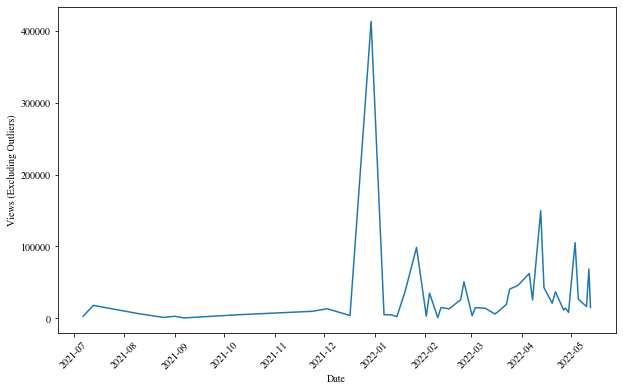

In [32]:
#views over time
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
x = df2.PUBLISHED_DATE
y = df2.VIEWS
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Views (Excluding Outliers)')
plt.xticks(rotation=45)
plt.show()

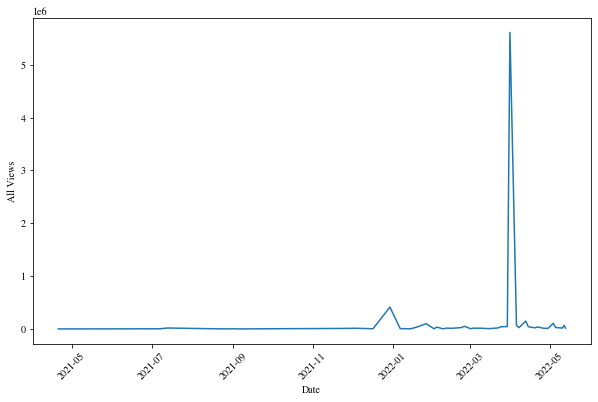

In [31]:
#ALL views over time (including for viral post)
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
x = df_update.PUBLISHED_DATE
y = df_update.VIEWS
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('All Views')
plt.xticks(rotation=45)
plt.show()

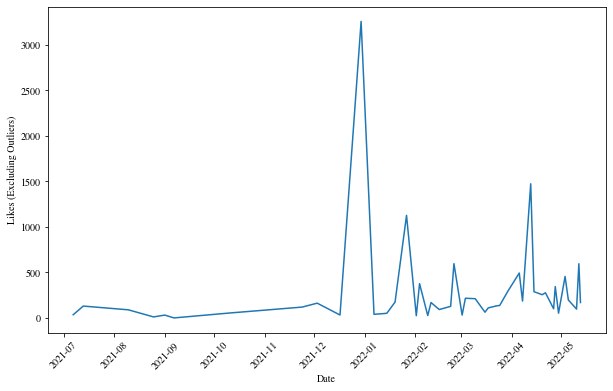

In [17]:
#likes over time
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
x = df2.PUBLISHED_DATE
y = df2.LIKES
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Likes (Excluding Outliers)')
plt.xticks(rotation=45)
plt.show()
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#

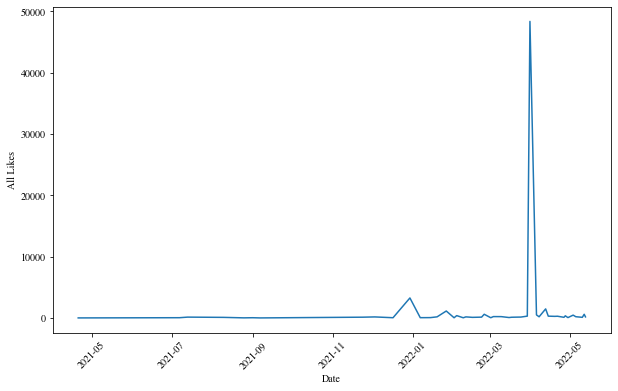

In [18]:
#ALL likes over time
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
x = df_update.PUBLISHED_DATE
y = df_update.LIKES
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('All Likes')
plt.xticks(rotation=45)
plt.show()

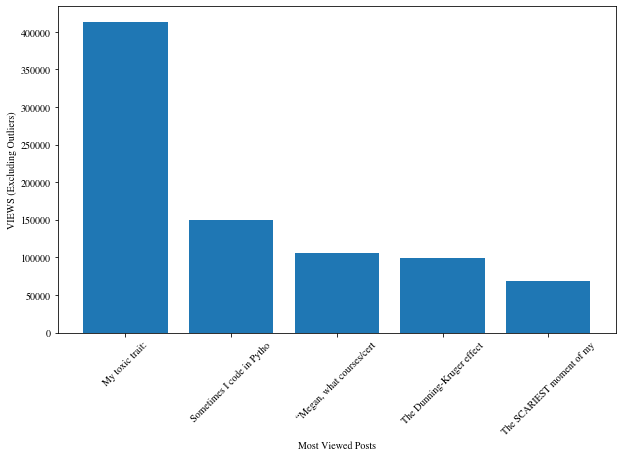

In [33]:
#most viewed posts, excluding outliers
top_viewed = df2.nlargest(n=5, columns = ['VIEWS'])
# top_viewed.sort_values(by='VIEWS', ascending=False)
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
x = top_viewed.text_snip
y = top_viewed.VIEWS
plt.bar(x, y)
plt.xlabel('Most Viewed Posts')
plt.xticks(rotation=45)
plt.ylabel('VIEWS (Excluding Outliers)')
plt.show()

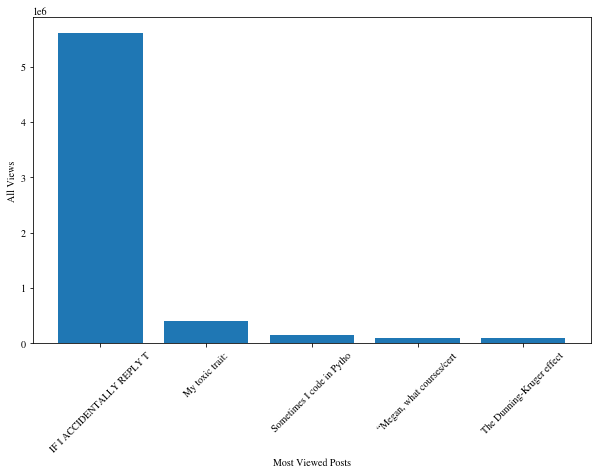

In [34]:
#most viewed posts (all)
top_viewed = df_update.nlargest(n=5, columns = ['VIEWS'])
# top_viewed.sort_values(by='VIEWS', ascending=False)
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
x = top_viewed.text_snip
y = top_viewed.VIEWS
plt.bar(x, y)
plt.xlabel('Most Viewed Posts')
plt.xticks(rotation=45)
plt.ylabel('All Views')
plt.show()

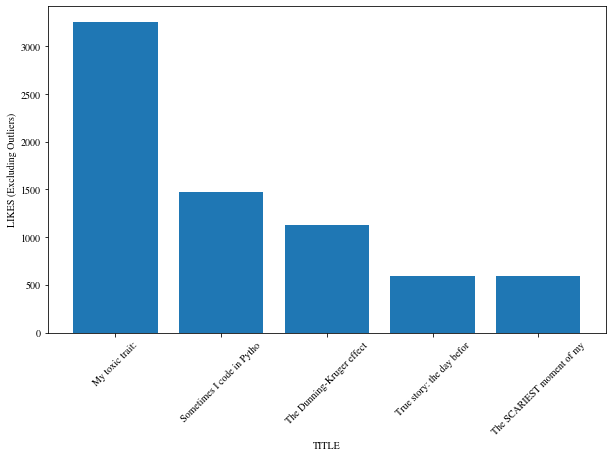

In [20]:
#most liked posts
top_liked = df2.nlargest(n=5, columns = ['LIKES']).sort_values(by='LIKES', ascending=False)
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
x = top_liked.text_snip
y = top_liked.LIKES
plt.bar(x, y)
plt.xlabel('TITLE')
plt.xticks(rotation=45)
plt.ylabel('LIKES (Excluding Outliers)')
plt.show()

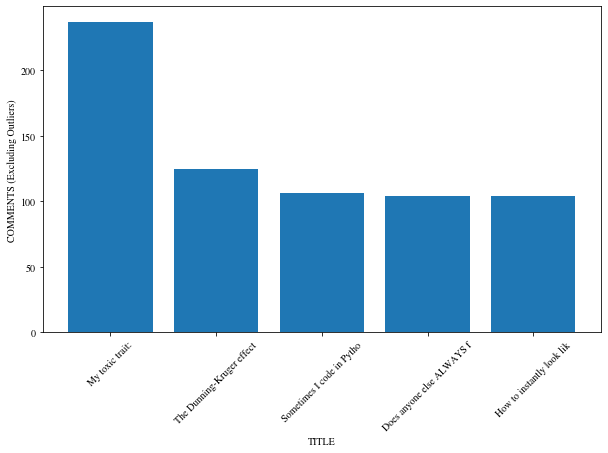

In [21]:
#most commented posts
top_commented = df2.nlargest(n=5, columns = ['COMMENTS']).sort_values(by='COMMENTS', ascending=False)
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
x = top_commented.text_snip
y = top_commented.COMMENTS
plt.bar(x, y)
plt.xlabel('TITLE')
plt.xticks(rotation=45)
plt.ylabel('COMMENTS (Excluding Outliers)')
plt.show()

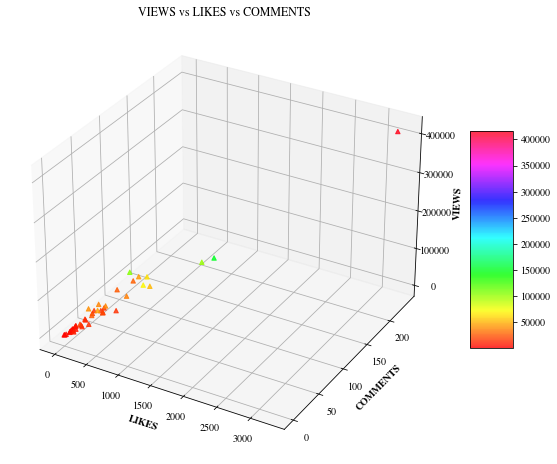

In [22]:
z = df2.VIEWS
x = df2.LIKES
y = df2.COMMENTS

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

# Creating color map
my_cmap = plt.get_cmap('hsv')

sctt = ax.scatter(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')

plt.title("VIEWS vs LIKES vs COMMENTS")
ax.set_zlabel('VIEWS', fontweight ='bold')
ax.set_xlabel('LIKES', fontweight ='bold')
ax.set_ylabel('COMMENTS', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

plt.show()

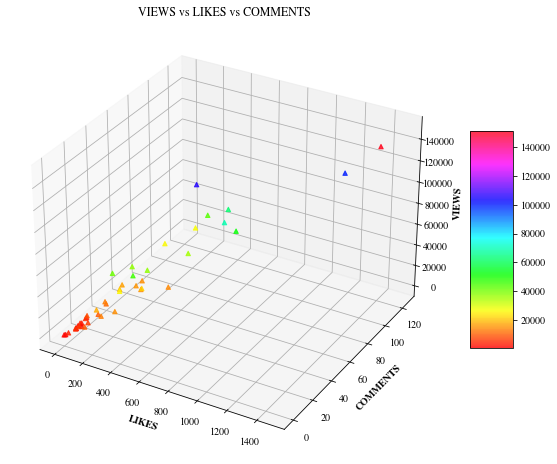

In [23]:
# REMOVING OUTLIER WITH 148K+ VIEWS
df3 = df2[df2['VIEWS']<150000]

z = df3.VIEWS
x = df3.LIKES
y = df3.COMMENTS

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

# Creating color map
my_cmap = plt.get_cmap('hsv')

sctt = ax.scatter(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')

plt.title("VIEWS vs LIKES vs COMMENTS")
ax.set_zlabel('VIEWS', fontweight ='bold')
ax.set_xlabel('LIKES', fontweight ='bold')
ax.set_ylabel('COMMENTS', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

plt.show()

<AxesSubplot:>

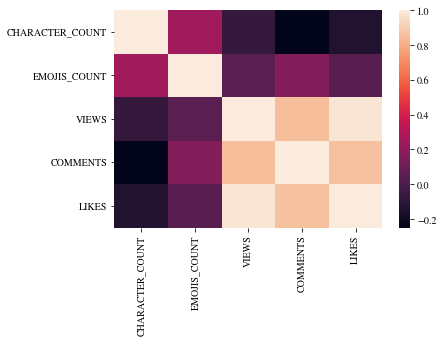

In [24]:
sns.heatmap(df2[['CHARACTER_COUNT', 'EMOJIS_COUNT', 'VIEWS', 'COMMENTS', 'LIKES']].corr())

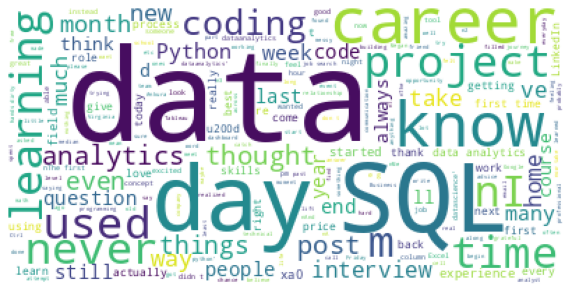

In [25]:
text = df2['TEXT'].values
stop_words=["n", "the", "s", "one", "I", "thing", "nBut"] + list(STOPWORDS)
wordcloud = WordCloud(background_color='white', stopwords = stop_words).generate(str(text))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Regression Model

In [26]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from statsmodels.compat import lzip
import statsmodels
from sklearn.pipeline import make_pipeline

In [27]:
# using df_update to include all posts
# using the assumption that getting comments and likes leads to more views on LinkedIn, not the other way around
X = df_update[['CHARACTER_COUNT', 'EMOJIS_COUNT', 'COMMENTS', 'LIKES']]
y = df_update['VIEWS']

#splitting data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [29]:
#Intercept: expected mean value of y when all x=0
intercept = model.intercept_
intercept_df = pd.DataFrame(data=[intercept], columns=['Coefficient'], index=['Intercept'])

# Coefficients: A unit increase of each will result in this much increase in Price
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

model_coeff_df = pd.concat([intercept_df, coeff_df])
model_coeff_df = model_coeff_df.drop(model_coeff_df[model_coeff_df['Coefficient']==0].index)
model_coeff_df

,Coefficient
Intercept,-7388.60
CHARACTER_COUNT,9.20
EMOJIS_COUNT,-514.21
COMMENTS,15.67
LIKES,120.12


In [30]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  VIEWS   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     157.4
Date:                Tue, 17 May 2022   Prob (F-statistic):           2.37e-16
Time:                        02:17:58   Log-Likelihood:                -308.86
No. Observations:                  28   AIC:                             627.7
Df Residuals:                      23   BIC:                             634.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -7388.6017   6081.322     -1.215      0.237      -2e+04    5191.571
CHARACTER_COUNT     9.1997      6.103      1.507      0.145      -3.425      21.824
EMOJIS_COUNT     -514.2089   1508.024     -0.341      0.736   -3633.795    2605.377
COMMENTS           15.6664    170.111      0.092      0.927    -336.235     367.568
LIKES             120.1177     12.880      9.326      0.000      93.473     146.762
==============================================================================
Omnibus:                        6.295   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                6.675
Skew:                           0.335   Prob(JB):                       0.0355
Kurtosis:                       5.296   Cond. No.                     1.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### On average, each additional character will result in 9.2 views, each emoji DECREASES views by 514.2 views, each comment increases views by 15.7 and each like contributes to 120.1 views. This model explains 96.5% of the variability observed in VIEWS